# 1. Deep Neural Networks Binary Classification Script with Transfer Learning

## Environment

In [1]:
# 1. Packages:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import warnings
import datetime
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# 2. Import functions:
%run Functions.ipynb

# 3. Activate GPU:
gpu = activate_gpu()

# 4. Set working directory:
working_directory = r"D:\GitHub\GitHub_Deep_Neural_Networks_Python"
os.chdir(working_directory)

# 5. Set dataset directory:
dataset_directory = r"D:\GitHub\GitHub_Deep_Neural_Networks_Python\Datasets\Cats_And_Dogs"

# 6. Set model name:
model_name = "ResNet50"

Imported functions:
- activate_gpu()
- generate_directories()
- build_binary_classification_transfer_learning_model()
- build_train_image_data_generators_flow_from_directory()
- build_callbacks()
- optimize_model()
- visualize_loss_accuracy_binary_classification()
- build_evaluate_image_data_generators_flow_from_directory()
- evaluate_binary_classification_model()

1 Physical GPUs, 1 Logical GPUs


## Parameters:

In [2]:
parameters = dict(shuffle = True,
                  batch_size = 16,
                  class_mode = "binary",
                  monitor = "val_binary_accuracy",
                  epochs = 10,
                  verbose = 1,
                  save_best_only = True,
                  restore_best_weights = True,
                  early_stopping_patience = 5)

augmentation_parameters = dict(horizontal_flip = True,
                               vertical_flip = True)

## Directories:

In [3]:
directories = generate_directories(model_name = model_name,
                                   model_type = "Binary",
                                   working_directory = working_directory,
                                   dataset_directory = dataset_directory)

Folder D:\GitHub\GitHub_Deep_Neural_Networks_Python\ResNet50 already exist
Folder D:\GitHub\GitHub_Deep_Neural_Networks_Python\ResNet50\Binary already exist


## Build & Compile Model using Transfer Learning:

In [4]:
model = build_binary_classification_transfer_learning_model(model_name = model_name)
model.compile(loss = tf.keras.losses.binary_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = tf.keras.metrics.BinaryAccuracy()) # ["accuracy"]

## Build Train Image Data Generators:

In [5]:
train_data_generators = build_train_image_data_generators_flow_from_directory(model = model,
                                                                              directories = directories,
                                                                              parameters = parameters,
                                                                              augmentation_parameters = augmentation_parameters)

Augmentation parameters:
-> horizontal_flip : True
-> vertical_flip : True
-> rescale : 0.00392156862745098

Found 9000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.


## Callbacks:

In [6]:
callbacks = build_callbacks(directories = directories,
                            parameters = parameters)

## Optimize Model:

In [7]:
history = optimize_model(model = model,
                         train_data_generators = train_data_generators,
                         parameters = parameters,
                         callbacks = callbacks)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
  1/563 [..............................] - ETA: 0s - loss: 0.8659 - binary_accuracy: 0.5625WARNING:tensorflow:From C:\Users\admin\anaconda3\envs\GPU_ML_TF\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
563/563 [==============================] - ETA: 0s - loss: 0.4943 - binary_accuracy: 0.7793
Epoch 00001: val_binary_accuracy improved from -inf to 0.50067, saving model to D:\GitHub\GitHub_Deep_Neural_Networks_Python\ResNet50\Binary\keras_model.weights.01-0.5007-0.7136.hdf5
563/563 [==============================] - 74s 132ms/step - loss: 0.4943 - binary_accuracy: 0.7793 - val_loss: 0.7136 - val_binary_accuracy: 0.5007
Epoch 2/10
563/563 [==============================] - ETA: 0s - loss: 0.3013 - binary_accuracy: 0.8709

## Visualize results:

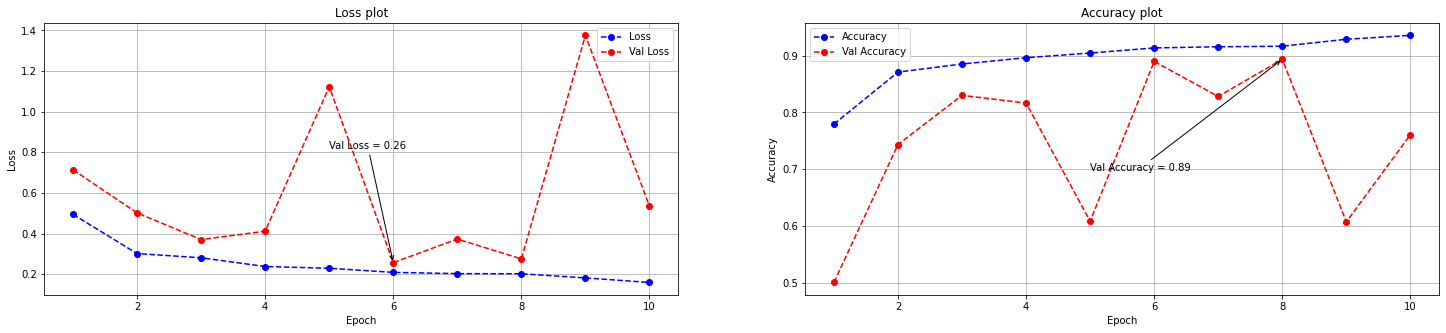

In [8]:
visualize_loss_accuracy_binary_classification(history = history)

## Build Evaluation Image Data Generators:

In [9]:
evaluate_data_generators = build_evaluate_image_data_generators_flow_from_directory(model = model,
                                                                                    directories = directories,
                                                                                    parameters = parameters)

Found 9000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Evaluate Image Data Generators:

In [10]:
evaluation = evaluate_binary_classification_model(model = model,
                                                  evaluate_data_generators = evaluate_data_generators)

Train generator evaluation
Instructions for updating:
Please use Model.evaluate, which supports generators.
Validation generator evaluation
Test generator evaluation


In [11]:
evaluation

,Train,Validation,Test
Loss,0.506451,0.534421,0.518282
Accuracy,0.771222,0.760667,0.764000
